In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix

In [2]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data1 = pd.read_csv("/content/drive/MyDrive/my dataset/diabetes_prediction_dataset.csv")

In [5]:
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
data1.shape

(100000, 9)

In [9]:
data1.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [10]:
data1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
numeric_col=[]
non_numeric_col=[]
for column in data1.columns:
    if pd.api.types.is_numeric_dtype(data1[column]):
        if(data1[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [12]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


In [13]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(12,10))
    sns.histplot(x=data1[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col}.')

    sns.boxplot(x=data1[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}     ')

 Univariate analysis for age column:
 Univariate analysis for bmi column:
 Univariate analysis for HbA1c_level column:
 Univariate analysis for blood_glucose_level column:


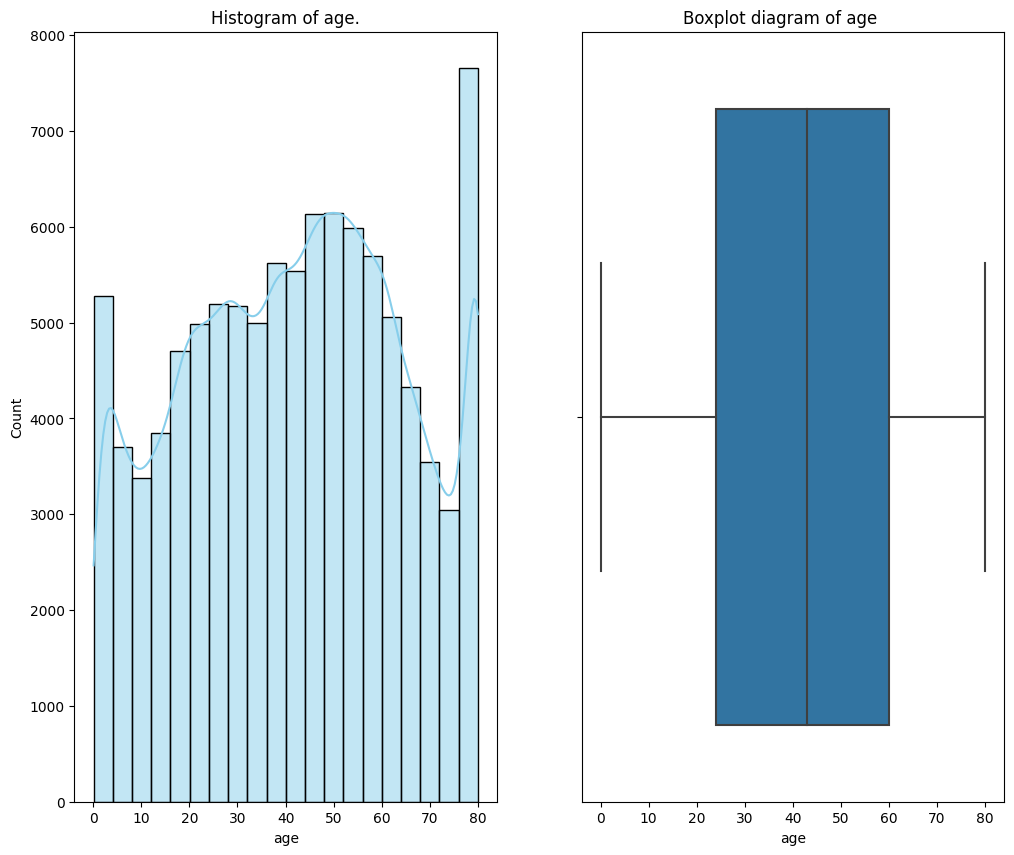

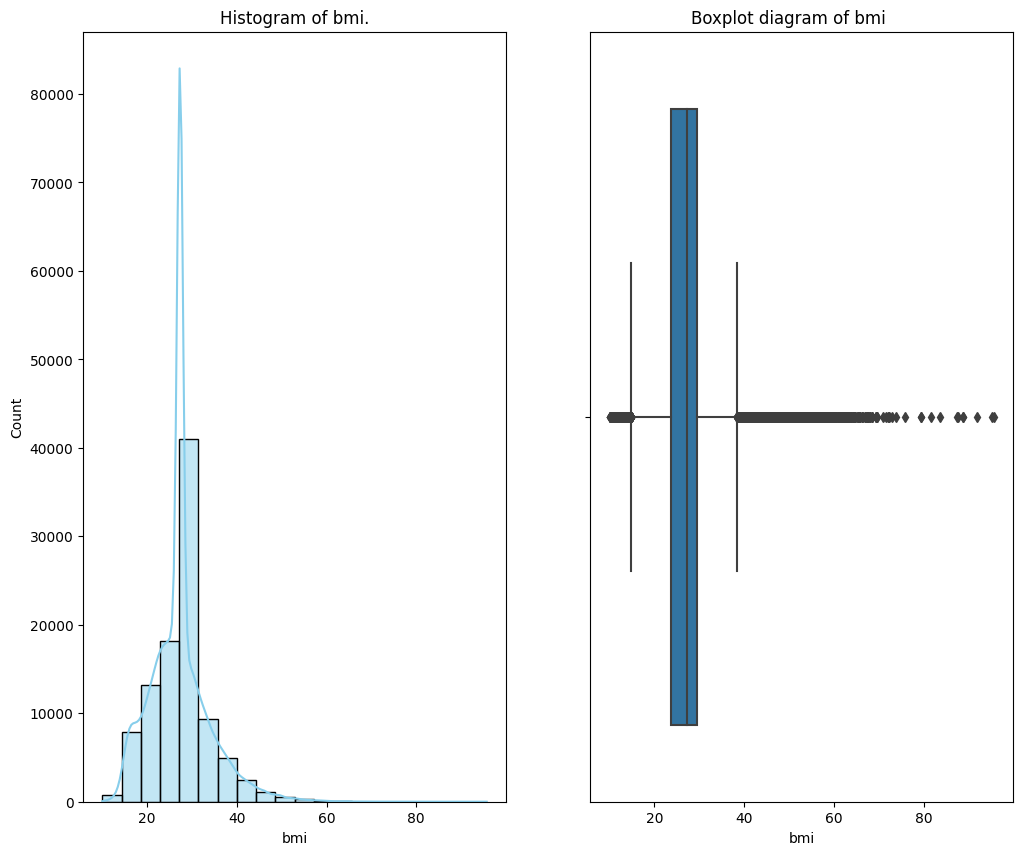

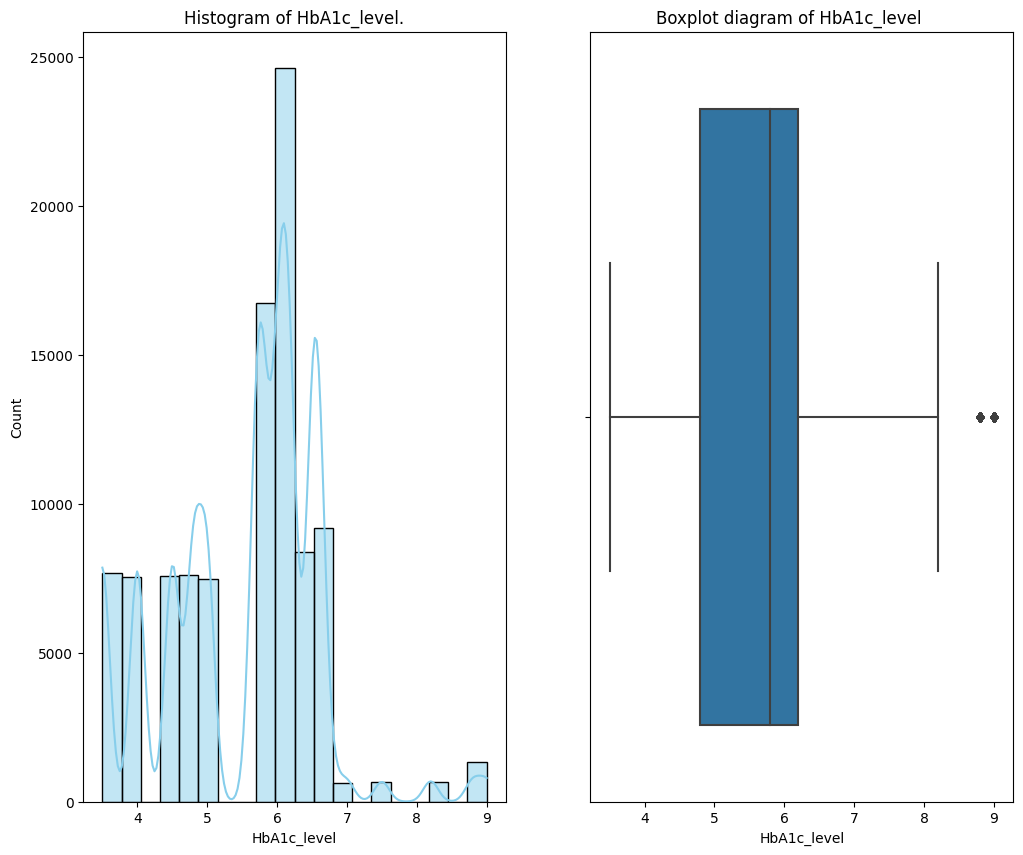

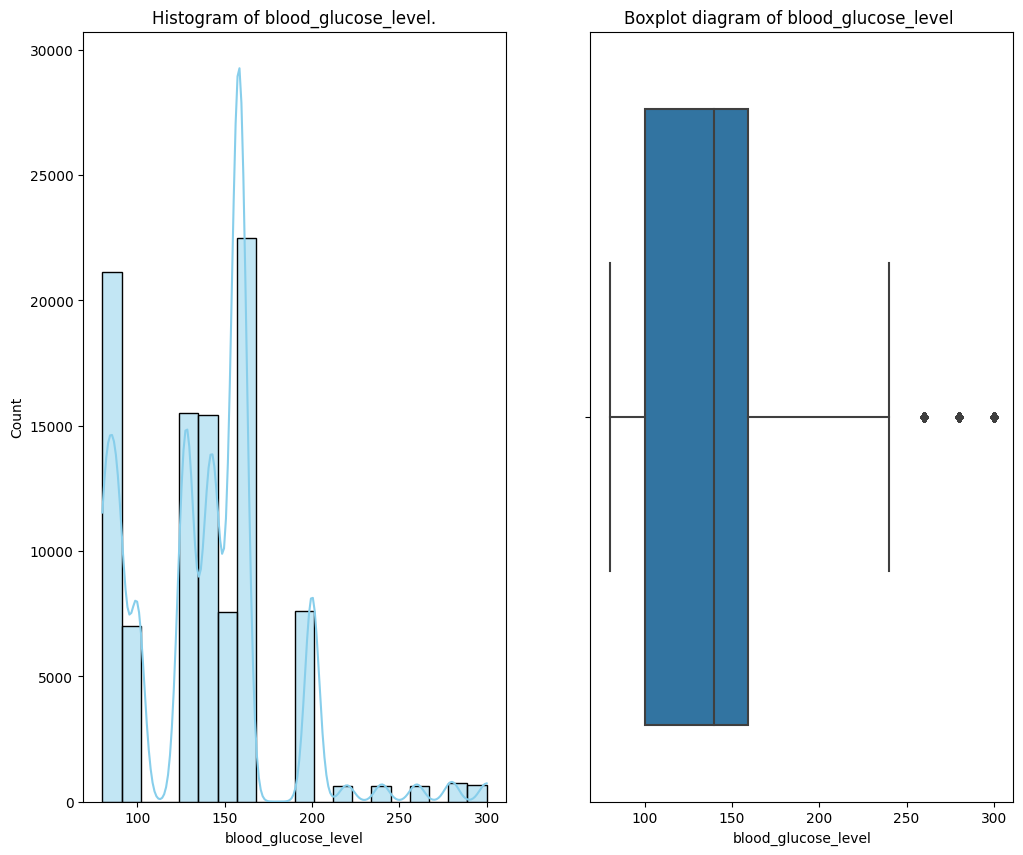

In [14]:
for col in numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [16]:
pd.unique(data1.smoking_history)

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [17]:
pd.unique(data1.gender)

array(['Female', 'Male', 'Other'], dtype=object)

In [18]:
def change_string_to_int(column):
    variables=pd.unique(data1[column])
    for item in range(variables.size):
        data1[column]=[item if each==variables[item] else each for each in data1[column]]
    return data1[column]

In [19]:
data1["gender"]=change_string_to_int("gender")

In [20]:
data1["smoking_history"]=change_string_to_int("smoking_history")

In [21]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


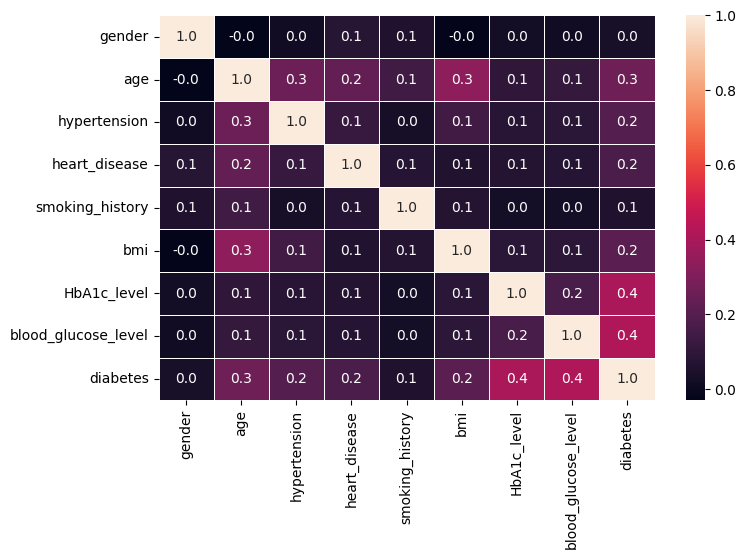

In [23]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data1.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

In [24]:
data1.drop("gender",axis=1,inplace=True)

In [25]:
data1.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


In [26]:
data1.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [27]:
data1 = (data1 - data1.min())/(data1.max()-data1.min())

In [28]:
data1.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.449449,0.0,0.0,0.4,0.156863,0.272727,0.340909,0.0
4,0.949950,1.0,1.0,0.4,0.118231,0.236364,0.340909,0.0


In [29]:
data1["hypertension"]= data1["hypertension"].astype("int64")
data1["heart_disease"]= data1["heart_disease"].astype("int64")
data1["diabetes"]= data1["diabetes"].astype("int64")

In [30]:
data1.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0,1,0.0,0.177171,0.563636,0.272727,0
1,0.674675,0,0,0.2,0.202031,0.563636,0.000000,0
2,0.349349,0,0,0.0,0.202031,0.400000,0.354545,0
3,0.449449,0,0,0.4,0.156863,0.272727,0.340909,0
4,0.949950,1,1,0.4,0.118231,0.236364,0.340909,0


In [31]:
x = data1.drop("diabetes",axis=1)
y = data1.diabetes

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [34]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (70000, 7)
x test:  (30000, 7)
y train:  (70000, 1)
y test:  (30000, 1)


In [35]:
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200,)
print("test accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.9587666666666667 
train accuracy: 0.9610571428571428 


In [36]:
y_pred = logreg.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

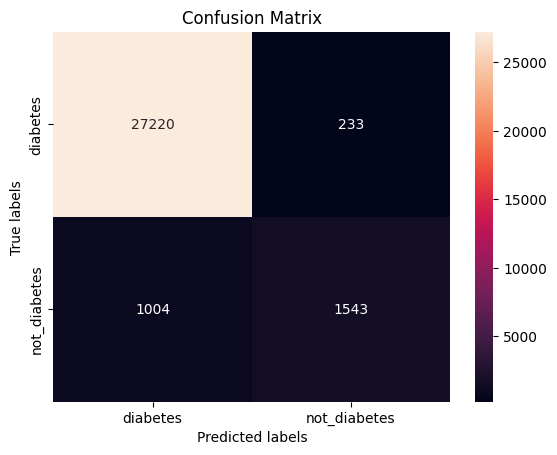

In [37]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

In [38]:
from sklearn.metrics import classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[27220,   233],
       [ 1004,  1543]])

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.87      0.61      0.71      2547

    accuracy                           0.96     30000
   macro avg       0.92      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [42]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Fit the model on the training data and evaluate on the test set
test_accuracy = random_forest.fit(x_train, y_train).score(x_test, y_test)
train_accuracy = random_forest.fit(x_train, y_train).score(x_train, y_train)

# Print the accuracies
print("Test accuracy: {} ".format(test_accuracy))
print("Train accuracy: {} ".format(train_accuracy))


Test accuracy: 0.9693 
Train accuracy: 0.9987714285714285 


In [43]:
y_pred = random_forest.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

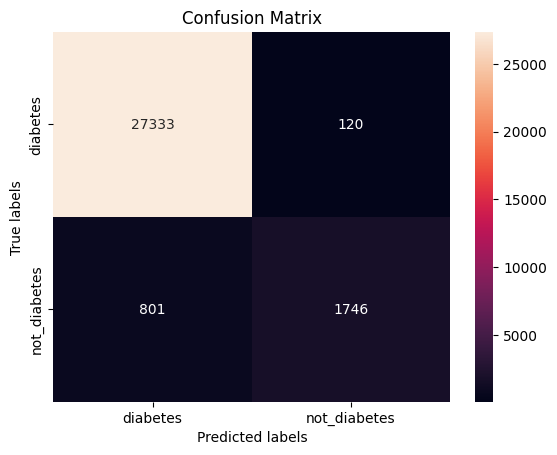

In [44]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

In [45]:
from sklearn.metrics import classification_report

In [46]:
confusion_matrix(y_test,y_pred)

array([[27333,   120],
       [  801,  1746]])

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.94      0.69      0.79      2547

    accuracy                           0.97     30000
   macro avg       0.95      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=None)

# Fit the model on the training data and evaluate on the test set
test_accuracy = decision_tree.fit(x_train, y_train).score(x_test, y_test)
train_accuracy = decision_tree.fit(x_train, y_train).score(x_train, y_train)

# Print the accuracies
print("Test accuracy: {} ".format(test_accuracy))
print("Train accuracy: {} ".format(train_accuracy))


Test accuracy: 0.9536666666666667 
Train accuracy: 0.9988 


In [50]:
y_pred = decision_tree.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

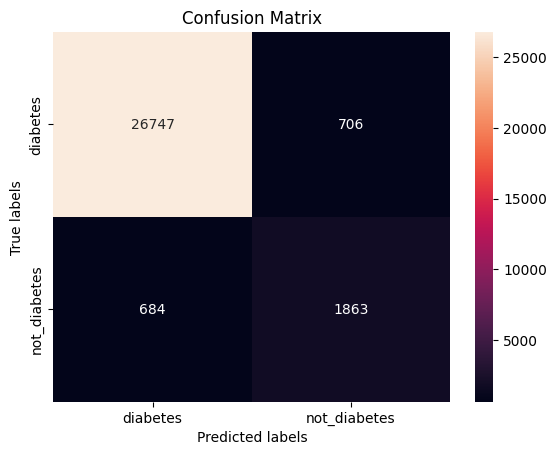

In [51]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

In [52]:
from sklearn.metrics import classification_report

In [53]:
confusion_matrix(y_test,y_pred)

array([[26747,   706],
       [  684,  1863]])

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000

